In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def rename(df):
    #rename column LR to Inference
    df = df.rename(columns={'LR': 'Inference'})
    #rename Inference level 0 to 'EM'
    df['Inference'] = df['Inference'].replace(0, 'EM')
    df['Inference'] = df['Inference'].replace(0.1, 'PyTorch')
    # go through each row in the dataframe and add a name column
    names = []
    for i in range(len(df)):
        if 'Watson' in df['modelname'][i]:
            if df['HMM'][i]==False:
                names.append(df['modelname'][i])
            else:
                names.append(df['modelname'][i]+' HMM')
        elif df['modelname'][i] in ['ACG','MACG']:
            if df['HMM'][i]==False:
                names.append(df['modelname'][i]+' rank='+str(df['ACG_rank'][i]))
            else:
                names.append(df['modelname'][i]+' rank='+str(df['ACG_rank'][i])+' HMM')
        else:
            names.append('Unknown')
    df['names'] = names
    return df

In [3]:
data_folder = '../data/results/torchvsEM_phase_controlled_results/'
df1 = pd.read_csv(data_folder+'phase_controlled_EM_Watson.csv')
df2 = pd.read_csv(data_folder+'phase_controlled_EM_ACG.csv')
df3 = pd.read_csv(data_folder+'phase_controlled_EM_MACG.csv')
df4 = pd.read_csv(data_folder+'phase_controlled_torch_Watson.csv')
df5 = pd.read_csv(data_folder+'phase_controlled_torch_ACG.csv')
df6 = pd.read_csv(data_folder+'phase_controlled_torch_MACG.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
df = rename(df)
df1 = pd.read_csv(data_folder+'phase_controlled_EM_Watson_initprevious.csv')
df2 = pd.read_csv(data_folder+'phase_controlled_EM_ACG_initprevious.csv')
df3 = pd.read_csv(data_folder+'phase_controlled_EM_MACG_initprevious.csv')
df4 = pd.read_csv(data_folder+'phase_controlled_torch_Watson_initprevious.csv')
df5 = pd.read_csv(data_folder+'phase_controlled_torch_ACG_initprevious.csv')
df6 = pd.read_csv(data_folder+'phase_controlled_torch_MACG_initprevious.csv')
df_initprevious = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
df_initprevious = rename(df_initprevious)

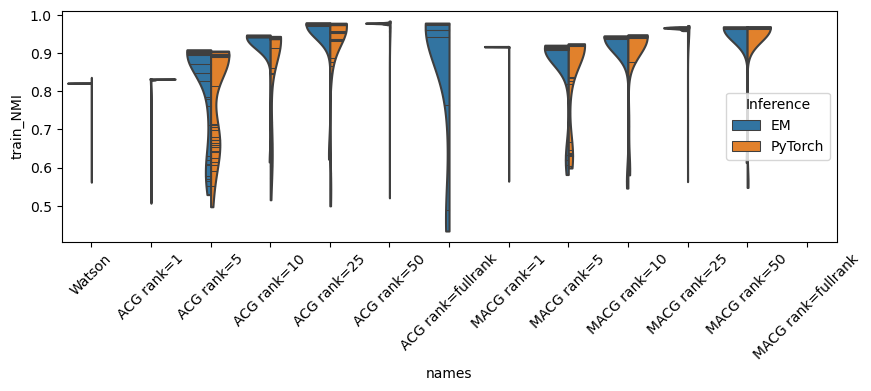

In [4]:
order = ['Watson', 
         'ACG rank=1', 'ACG rank=5', 'ACG rank=10', 'ACG rank=25', 'ACG rank=50', 'ACG rank=fullrank', 
         'MACG rank=1', 'MACG rank=5', 'MACG rank=10', 'MACG rank=25', 'MACG rank=50', 'MACG rank=fullrank']
plt.figure(figsize=(10,3))
sns.violinplot(x='names', y='train_NMI', data=df[df['HMM']==False],hue='Inference',split=True, order=order,inner='stick',cut=0)
plt.xticks(rotation=45);

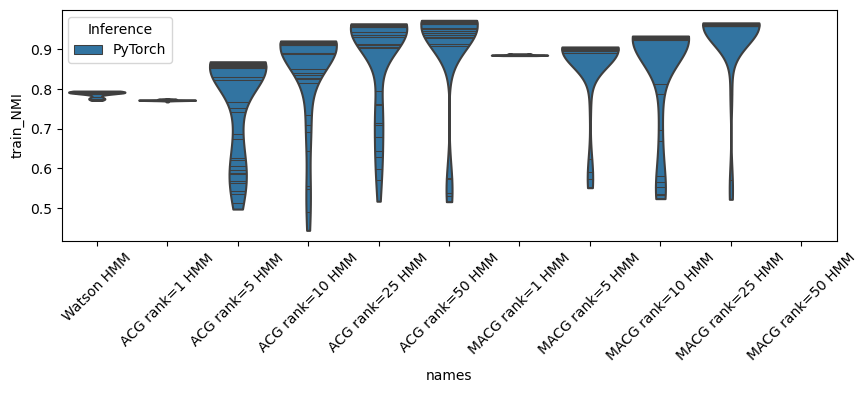

In [5]:
order = ['Watson HMM', 
         'ACG rank=1 HMM', 'ACG rank=5 HMM', 'ACG rank=10 HMM', 'ACG rank=25 HMM', 'ACG rank=50 HMM', 
         'MACG rank=1 HMM', 'MACG rank=5 HMM', 'MACG rank=10 HMM', 'MACG rank=25 HMM', 'MACG rank=50 HMM']
plt.figure(figsize=(10,3))
sns.violinplot(x='names', y='train_NMI', data=df[df['HMM']==True],hue='Inference', order=order,inner='stick',cut=0)
plt.xticks(rotation=45);

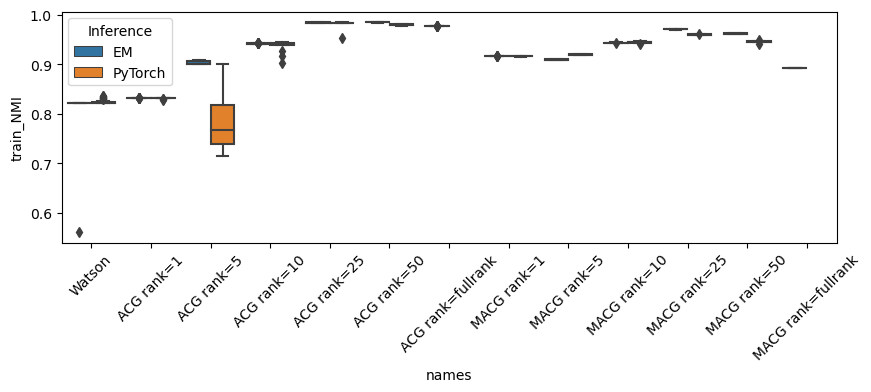

In [6]:
order = ['Watson', 
         'ACG rank=1', 'ACG rank=5', 'ACG rank=10', 'ACG rank=25', 'ACG rank=50', 'ACG rank=fullrank', 
         'MACG rank=1', 'MACG rank=5', 'MACG rank=10', 'MACG rank=25', 'MACG rank=50', 'MACG rank=fullrank']
plt.figure(figsize=(10,3))
# sns.violinplot(x='names', y='train_NMI', data=df_initprevious[df_initprevious['HMM']==False],hue='Inference',split=True, order=order,inner='stick',cut=0)
sns.boxplot(x='names', y='train_NMI', data=df_initprevious[df_initprevious['HMM']==False],hue='Inference',order=order)
plt.xticks(rotation=45);

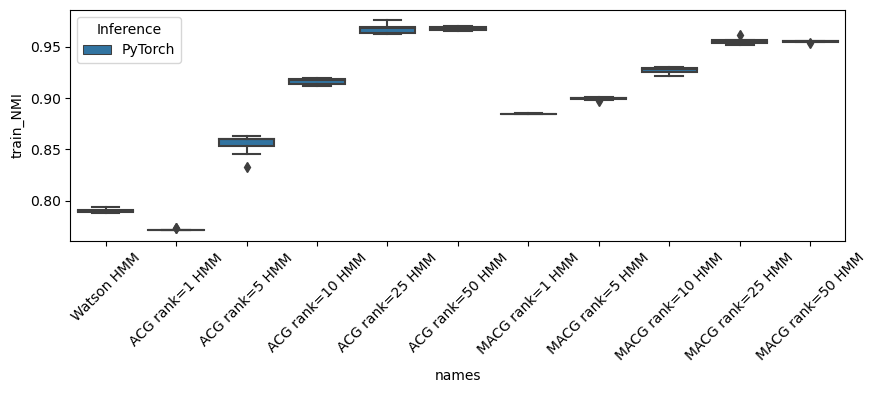

In [7]:
order = ['Watson HMM', 
         'ACG rank=1 HMM', 'ACG rank=5 HMM', 'ACG rank=10 HMM', 'ACG rank=25 HMM', 'ACG rank=50 HMM', 
         'MACG rank=1 HMM', 'MACG rank=5 HMM', 'MACG rank=10 HMM', 'MACG rank=25 HMM', 'MACG rank=50 HMM']
plt.figure(figsize=(10,3))
sns.boxplot(x='names', y='train_NMI', data=df_initprevious[df_initprevious['HMM']==True],hue='Inference', order=order)
plt.xticks(rotation=45);

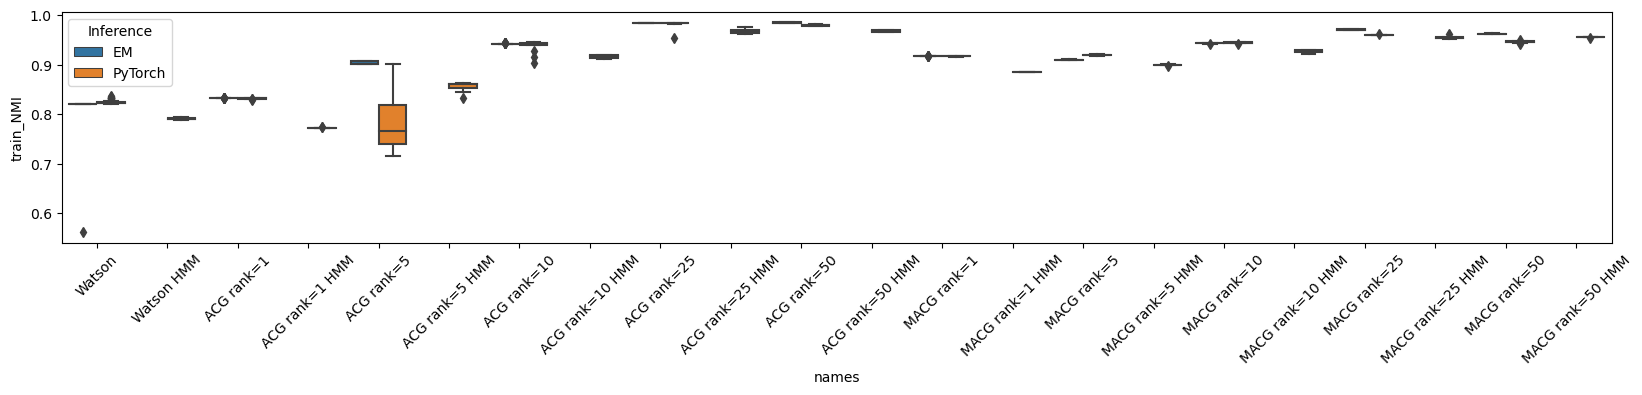

In [10]:
order = ['Watson','Watson HMM', 
         'ACG rank=1','ACG rank=1 HMM', 'ACG rank=5','ACG rank=5 HMM', 'ACG rank=10','ACG rank=10 HMM', 'ACG rank=25','ACG rank=25 HMM', 'ACG rank=50','ACG rank=50 HMM', 
         'MACG rank=1','MACG rank=1 HMM', 'MACG rank=5','MACG rank=5 HMM', 'MACG rank=10','MACG rank=10 HMM', 'MACG rank=25','MACG rank=25 HMM', 'MACG rank=50','MACG rank=50 HMM']
plt.figure(figsize=(20,3))
sns.boxplot(x='names', y='train_NMI', data=df_initprevious,hue='Inference', order=order)
plt.xticks(rotation=45);